### Digits手写数字数据集

- 导入Digits数据集
- 可视化一些样本数据
- 探索数据的分布规律
- T-SNE非线性降维
- PCA主成分分析降维

In [26]:
#导入工具包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#忽略系统的警告提示
import warnings
warnings.filterwarnings('ignore')

#正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

#### 1.导入digits数据集

In [2]:
from sklearn import datasets

digits = datasets.load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
#打印digits数据集中包含的主要内容
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
#打印digits数据集说明
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [6]:
#获取digits数据集的样本和特征
samples = digits.data
label = digits.target

#### 2.可视化其中一些样本

Text(0.5, 1.0, 'True label:1')

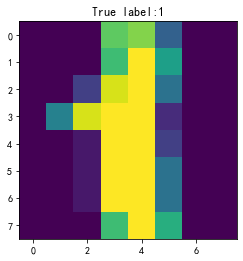

In [7]:
#可视化其中一个样本

plt.imshow(samples[1].reshape(8,8))
plt.title('True label:{}'.format(label[1]))

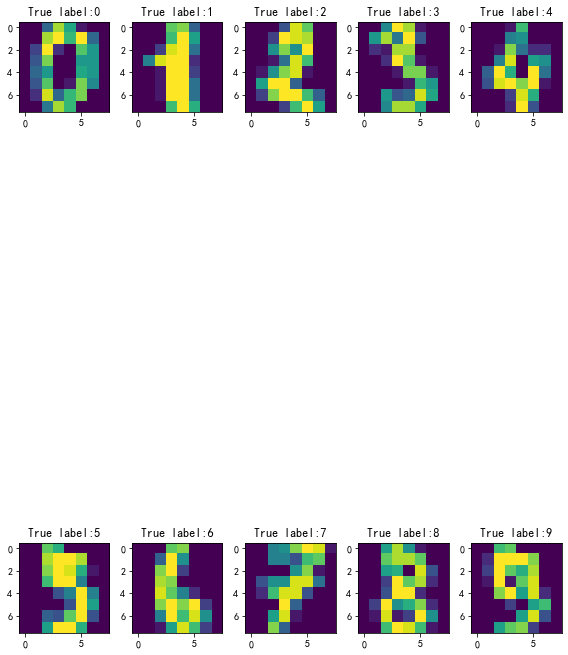

In [8]:
#可视化前10个样本

plt.figure(figsize = (8,20))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(samples[i].reshape(8,8))
    plt.title('True label:{}'.format(label[i]))
plt.tight_layout()

#### 3.T-SNE数据降维

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2,init = 'pca',random_state = 0)
X_tsne = tsne.fit_transform(samples)

In [ ]:
X_tsne.shape

In [ ]:
X_tsne[:5]

In [ ]:
#对降维后的数据进行归一化处理
from sklearn.preprocessing import MinMaxScaler
X_tsne = MinMaxScaler().fit_transform(X_tsne)

In [ ]:
X_tsne[:5]

In [ ]:
#可视化降维后的结果

plt.figure(figsize = (10,8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'coral', 'lime']
for i in range(samples.shape[0]):
    plt.text(X_tsne[i,0],X_tsne[i,1],str(label[i]),color=colors[label[i]],fontdict = {'weight':'bold','size':15})
plt.xticks([])
plt.yticks([])
plt.title('TSNE降维 - 手写数字识别数据集展示')


In [ ]:
#将digits数据集降到3维

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 3,init = 'pca',random_state = 0)
X_tsnes = tsne.fit_transform(samples)

In [ ]:
X_tsnes.shape

In [ ]:
X_tsnes[:5]

In [ ]:
list(range(10))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax1 = Axes3D(fig)

for lab,color,category in zip(label,colors,list(range(10))):
    ax1.scatter3D(X_tsnes[label == lab,0],
               X_tsnes[label == lab,1],
               X_tsnes[label == lab,2],
               label = category,
               c = color)
ax1.set_xlabel('X',fontdict = {'size':15,'color':'red'})
ax1.set_ylabel('Y',fontdict = {'size':15,'color':'red'})
ax1.set_zlabel('Z',fontdict = {'size':15,'color':'red'})
ax1.legend()

#### 4.PCA降维

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(samples)

In [ ]:
X_pca.shape

In [ ]:
#可视化降维后的结果

plt.figure(figsize = (10,8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'coral', 'lime']
for i in range(samples.shape[0]):
    plt.text(X_pca[i,0],X_pca[i,1],str(label[i]),color=colors[label[i]],fontdict = {'weight':'bold','size':15})
plt.xticks([])
plt.yticks([])
plt.title('PCA降维 - 手写数字识别数据集展示')
plt.show()

In [ ]:
#将原始数据降至3维
pca = PCA(n_components = 3,random_state = 0)
X_pca3 = pca.fit_transform(samples)

In [ ]:
X_pca3.shape

In [ ]:
#可视化降维后的结果
fig = plt.figure(figsize = (8,8))
ax1 = Axes3D(fig)

for lab,color,category in zip(label,colors,list(range(10))):
    ax1.scatter3D(X_pca3[label == lab,0],
               X_pca3[label == lab,1],
               X_pca3[label == lab,2],
               label = category,
               c = color)
ax1.set_xlabel('X',fontdict = {'size':15,'color':'red'})
ax1.set_ylabel('Y',fontdict = {'size':15,'color':'red'})
ax1.set_zlabel('Z',fontdict = {'size':15,'color':'red'})
ax1.legend()